In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import polyfit,polyval 

from matplotlib.gridspec import GridSpec


import matplotlib as mpl
mpl.rcParams['font.serif'] = "Bitstream Vera Serif"
mpl.rcParams['font.family'] = "serif"
mpl.rcParams['font.size'] = 18

In [2]:
# silver_rp=np.load('/reg/neh/home/qiaoshen/run16_notebooks/find_center/run56_silverB_rp1.npy')
silver_rp=np.load('/reg/d/psdm/cxi/cxilr6716/scratch/centerCalib_calibration/silverRP_run56_z400.npy')

In [3]:
2*np.pi/58.380*np.array([2,4,8])

array([ 0.2152513 ,  0.43050259,  0.86100518])

In [4]:
z = -np.array([200,400,300,100])

n = np.array([[228.,152,75],
             [60,134,269],
             [211,168,112],
             [288,192,96]]).astype(np.float32)

q_guess = np.array([[3,2,1],
                  [2,4,8],
                   [4,3,2],
                   [3,2,1]])*2*np.pi/58.380

photon_energy = 9.5e3 #eV
c = 3.998e8 #SI
h = 6.6260700e-34 #SI
ev_to_j = 1.60218e-19 #SI
wavlength = c*h/(photon_energy*ev_to_j)*1e10 #angstrom
pix_size = 110e-6 # meter
print wavlength

theta = np.arcsin(q_guess*wavlength/(np.pi*4))
ds = n*pix_size/np.tan(theta*2)
mean_det_dist=ds.mean(-1)
derr=ds.std(-1)

1.74045940432


In [5]:
z2 = -np.array([400,350,300,250,200,150,100,50])

n2 = np.array([[269.,134,60.],#30
               [344.,172.,79.],#40
             [211.,168.,112.],#54
               [66.,132.,199],#66
             [229,153,76],#76
               [87.,173.,259],
              [288.,192.,96], #96
              [106.,212.,319.]]).astype(np.float32)

q_guess = np.array([[9,4,2],
                    [8,4,2],
                  [4,3,2],
                    [1,2,3],
                   [3,2,1],
                    [1,2,3],
                   [3,2,1],
                   [1,2,3]])*2*np.pi/58.380

photon_energy = 9.5e3 #eV
c = 3.998e8 #SI
h = 6.6260700e-34 #SI
ev_to_j = 1.60218e-19 #SI
wavlength = c*h/(photon_energy*ev_to_j)*1e10 #angstrom
pix_size = 110e-6 # meter
print wavlength

theta = np.arcsin(q_guess*wavlength/(np.pi*4))
ds2 = n2*pix_size/np.tan(theta*2)
mean_det_dist2=ds2.mean(-1)
derr2 = ds2.std(-1)

1.74045940432


[ 0.00078286  0.43388869]
[ 0.12074416]
[ 0.0015084   0.00551889  0.0059334   0.00038995]
[ 0.00079379  0.43568336]
[ 0.11816718]


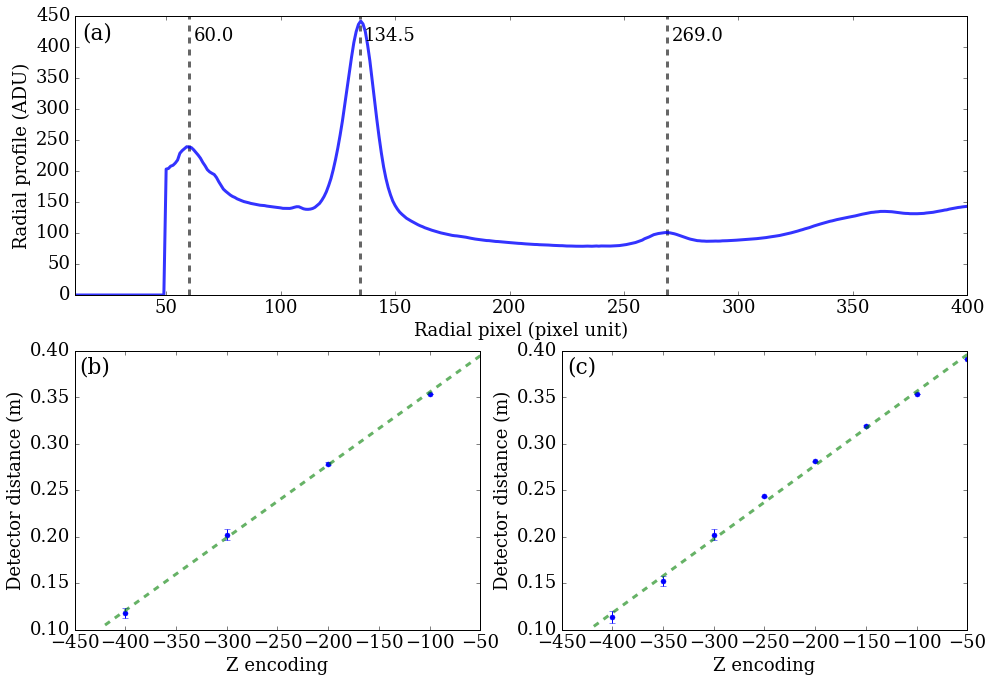

In [7]:
plt.figure(figsize=[16,11])
gs = GridSpec(2,2)

fit_z = -np.arange(50,430,10)

###### distance 1
ax=plt.subplot(gs[1,0])
ax.set_title('(b)', x= 0.05,y =0.9, color='Black')
cc = polyfit(z,mean_det_dist,deg=1)
print cc
print polyval(cc,[-400])
print derr
plt.errorbar(z, mean_det_dist,yerr=derr,
             marker='.', ls='none', markersize = 10)
fit = polyval(cc,fit_z)
plt.plot(fit_z,fit,linestyle='--'
        , linewidth = 3, alpha=0.6)
plt.xlabel('Z encoding')
plt.ylabel('Detector distance (m)')

######distance 2
ax=plt.subplot(gs[1,1])
ax.set_title('(c)', x= 0.05,y =0.9, color='Black')
plt.errorbar(z2, mean_det_dist2,yerr=derr2,
             marker='.', ls='none', markersize = 10)
cc = polyfit(z2,mean_det_dist2,deg=1)
print cc
print polyval(cc,[-400])
fit = polyval(cc,fit_z)
plt.plot(fit_z,fit,linestyle='--', linewidth = 3, alpha=0.6)
plt.xlabel('Z encoding')
plt.ylabel('Detector distance (m)')

################################# find radius of rings
ax=plt.subplot(gs[0,:])
ax.set_title('(a)', x= 0.025,y =0.9, color='Black')
plt.plot(silver_rp, linewidth = 3, alpha=0.8)
# plt.vlines([fit2[-1],fit3[-1],fit4[-1]],0,500)
pos = [269.,134.5,60.]
plt.vlines(pos,0,450, linestyle='--', linewidth=3,alpha=0.6)
for pp in pos:
    plt.text(s=pp,x=pp+2,y=410)
plt.ylim(0,450)
plt.xlim(10,400)
plt.xlabel('Radial pixel (pixel unit)')
plt.ylabel('Radial profile (ADU)')

# plt.savefig('det_dist_fit.png',bbox_in_inches='tight')

In [100]:
derr2[0], mean_det_dist[1]

(0.0067477709167506643, 0.1182978504281889)

In [99]:
11.8+0.6

12.4

In [23]:
np.sin(np.arctan(704*pix_size/ds.mean(-1)[1])/2.) *4*np.pi/ wavlength

2.0632860764694252

In [149]:
-360*0.00074+0.424

0.15760000000000002